## 1.. How to read data using sqlite3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [2]:
import sqlite3

In [3]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r'G:\Data Science projects\EDA_Projects\
zomato-bangalore-restaurants\Data_enginnering/zomato_rawdata.sqlite')

In [4]:
#### check online its table name on https://sqliteonline.com/

In [5]:
## takes 40-50 sec

pd.read_sql_query("SELECT * FROM Users", con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


#### reading some n number of rows, use LIMIT over there

In [6]:
pd.read_sql_query("SELECT * FROM Users LIMIT 2", con).head(2)

#If we want to load huge amount of data into batches,we can use 
# chunksize parameter,by default it is None

#Syntax is = pd.read_sql_query(query,engine,chunksize=None,parse_dates=None)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [7]:
## takes 40-50 sec

df = pd.read_sql_query("SELECT * FROM Users ", con)

In [8]:
df.shape

(51717, 18)

## 2.. how to deal with missing values ? 

    its not good to drop missing value right now as we might 
    loose important info , so 
    we will deal with it depending upon the problem statements ..

In [9]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [11]:
'''
     -->> As we notice around 50 % of data will be lost if 
          we delete the nan values in dish_liked column
          We will keep that column for now..
        
     -->> let's check for rate column as it contains 15% of 
          its points as null value which is one of the most 
          important feature.. 
         
'''

"\n     -->> As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column\n         We will keep that column for now..\n        \n     -->> let's check for rate column as it contains 15% of its points as null value which \n         is one of the most important feature.. \n         \n"

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

    -->> 1... So, Now we found this column has 'NEW' ,"-" values 
              which should replaced by "zero" or "np.nan" 
              after having conversation with my business team 
              ( Domain Expertise)..

    -->> 2...there are values as '3.8/5' instead of 3.8 , 
             ie we have to fix this .. 

#### so lets replace 'NEW' & '-' with np.nan ,so that we can fill later it with some value..

In [13]:
df['rate'].replace(('NEW','-'),np.nan,inplace =True)


#df.replace('NEW', np.nan,inplace=True)
#df.replace('-', np.nan,inplace=True)

### df['rate'].str.replace('NEW','np.nan')
### df['rate'].str.replace('-','np.nan')

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

####  /5 is un-necessary in every rating , ie there is no need of this !
    Ways to do it..
    a.. Just access 4.1 from 4.1/5
    b.. Just replace '/5' to ' '

In [15]:
df['rate'] = df['rate'].apply(lambda x: \
              float(x.split('/')[0]) if type(x)==str else x)

In [16]:
df['rate'].isnull().sum()

10052

###### how to deal with these missing values ,, 
    -->> if its a ML/NLP/DL project , then filling 
          missing values makes alot of sense..

    -->> but as its is data analysis project & Imagine we do not 
        have domain knowledge , then its good to continue with existing 
        Genuine data rather than filling missing values  or deleting it..
    
        -->>> Bcz if we fill missing values then it can 
              affect our real analysis  ,
              
        -->>  & if we delete our missing values,then we will 
                lose our data & hence we will end up having 
                incomplete analysis

In [17]:
### conclusion-->> we will stay with these missing values 
# in our data... & we will deal it further..

In [18]:
## drop missing values.. -- it will not make sense as 
# we can loose some important information...

## df.dropna(axis='index',subset=['rate'],inplace=True)

In [19]:
df.duplicated().sum() ## takes 1 min 

0

## 3.. Is there a relation between online order option and rating of the restaurant ?

In [20]:
### lets find out relation b/w rating & online_order
### ie how many restaurants that have rating 0 , 1 , 1.2 , 
# 1.4 , 1.6--- & that accepts online_order & do not accept order

### for such problem statement , we will create frequency tables..

In [21]:
'''

## online order with rating :
    ie whether offline order rest have good rating
    or whether online order rest have good rating

'''

'\n\n## online order with rating :\n    ie whether offline order rest have good rating\n    or whether online order rest have good rating\n\n'

In [22]:
x = pd.crosstab(df['rate'], df['online_order'])

In [23]:
'''

Do follow : 5.. DA_Uber_trip_analysis_possible_ways.piynb

2.. ways to create same pivot_table : 3 ways
	using pd.pivot_table() , pd.crosstab() , groupby() + unstack()

'''

'\n\nDo follow : 5.. DA_Uber_trip_analysis_possible_ways.piynb\n\n2.. ways to create same pivot_table : 3 ways\n\tusing pd.pivot_table() , pd.crosstab() , groupby() + unstack()\n\n'

In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [26]:
'''

### u can also create this table using groupby !

df.groupby(['rate','online_order']).apply(lambda x : len(x)).unstack()

'''

"\n\n### u can also create this table using groupby !\n\ndf.groupby(['rate','online_order']).apply(lambda x : len(x)).unstack()\n\n"

<AxesSubplot:xlabel='rate'>

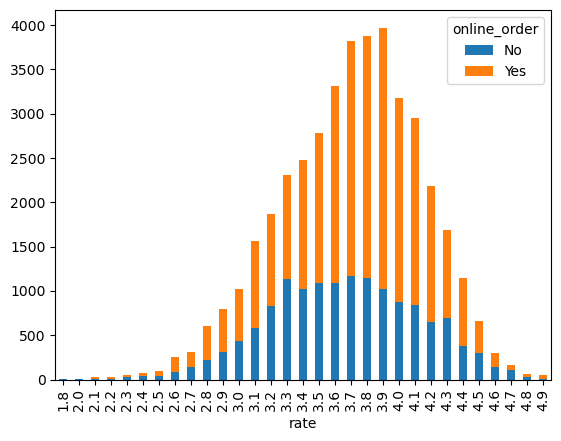

In [27]:
### stacked = True gives basically stacked bar chart
x.plot(kind='bar', stacked = True)

In [28]:
### lets modify above visual & get better results/inferences..

In [29]:
## axis = 1 means summation across rows.,as by-default axis is 0
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [30]:
## we need Floating division of dataframe or normalized values 
## of x dataframe across rows..just call x.div() & set axis=0

## div is a in-built function of pandas designed for 
## dataframe data-structure..

normalise_df = x.div(x.sum(1).astype(float) , axis = 0)
normalise_df

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [31]:
normalise_df.apply(lambda x : x * 100) 

## multiply each value by 100 so that we will get better results in % !

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<AxesSubplot:xlabel='rate'>

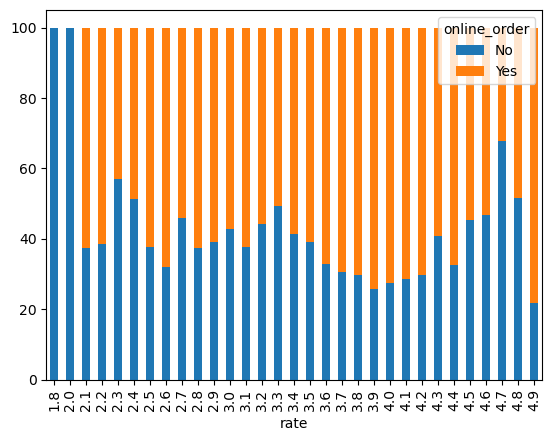

In [32]:
###  stacked=True gives basically stacked bar chart
normalise_df.apply(lambda x : x * 100).plot(kind = 'bar' ,\
                                            stacked = True)

In [33]:
'''

For good rating ie > 4 , for most instances it seems that rest 
who accepts online order have received more number of ratings
than those rest. who don't accept online order 

'''

"\n\nFor good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings\nthan those rest. who don't accept online order \n\n"

In [34]:
### similar to above one -->> Is there a relation between table 
## booking option and rating of the restaurant?

## 4.. Data Cleaning to perform Text Analysis 
    Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

## ways to do it..

    a) using wordcloud
    
        But wordcloud will not give a clear cut , how important words are
        So lets use a concept of frequency over here...
        
    b) using plots/charts-- where each word have some frequency..
    

### b) using plots/charts
    We need Pre-processed data so that we can plot charts
    ie  (Biryani , 10K)
        (Chicken , 15K)
        etc..
        
        How to Perform Data Pre-processing to pre-process this data..
        Steps-->>
            a) Perform Lower-case operation
            
            b) Do tokenization
            
            c) Removal of stopwords from data
            
            d) Store your entire data in the list so that we can 
                commpute frequency of each word
                
            e) Do plotting using Unigram ,bigram & Trigram analysis..

In [35]:
### ie first we need whole data of 'Quick Bites' , 
## but first & foremost lets make this feature 'rest_type' clean , ie 
## remove missing values in this feature if available ..

In [36]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [37]:
data = df.dropna(subset=['rest_type'])

In [38]:
data['rest_type'].isnull().sum()

0

In [39]:
### extracting data of 'Quick Bites' only ..

In [40]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [41]:
quick_bites_df .shape

(20639, 18)

In [42]:
#### a) Perform Lower-case operation

In [43]:
# Converting all the text to lowercase , takes 2 min for whole df..

quick_bites_df ['reviews_list'] = quick_bites_df ['reviews_list'].\
                                        apply(lambda x: x.lower())

In [44]:
#### b) Do tokenization

In [45]:
from nltk.corpus import RegexpTokenizer as regextoken

In [46]:
##  Creating a regular expression tokenizer that have only 
## alphabets , ie remove all the special characters
# This will return separate words (tokens) from the text in the form of list

tokenizer = regextoken("[a-zA-Z]+") 

In [47]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [48]:
quick_bites_df['reviews_list'].index

Int64Index([    3,    23,    26,    31,    34,    36,    39,    40,    42,
               43,
            ...
            51634, 51635, 51638, 51639, 51640, 51641, 51642, 51643, 51644,
            51645],
           dtype='int64', length=20639)

In [49]:
quick_bites_df ['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [50]:
## tokenize data of very first review
print(tokenizer.tokenize(data['reviews_list'][3]))

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [51]:
data.shape

(51490, 18)

In [52]:
# Applying the tokenizer to each row of the reviews
# take around 8-10 mins for 51490 rows .. 
# take 1-2 mins for 1k-10K Rows

# reviews_tokens = data['reviews_list'].apply(tokenizer.tokenize)

In [56]:
sample = data[0:10000]

In [57]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [58]:
len(reviews_tokens)

10000

## 5.. Performing Unigram analysis & removal of stopwords ..

In [55]:
#### c) Removal of stopwords from data

In [59]:
from nltk.corpus import stopwords

In [60]:
# These are common words defined by Python developers that typically 
## don't add meaning to the text and can be removed

stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
### we will figure out there are some more stopwords in my data, that we can add it to my stop list

In [76]:
# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x" , "RATED" , "Rated"])

In [77]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
### with respect to very first row, how to remove stopwords
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [79]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [63]:
## takes 1 mins
## remove stopwords from my entire data

## reviews_tokens_clean = reviews_tokens.apply(lambda x: \
##                       [token for token in x if token not in stop])

In [80]:
## takes 1 min for 10K rows !

reviews_tokens_clean = reviews_tokens.apply(lambda each_review: \
            [token for token in each_review if token not in stop])

In [ ]:
'''

### using function

def remove_stopwords(text):
    updated_text=[token for token in text if token not in stop]
    return updated_text

reviews_tokens_clean = reviews_tokens.apply(remove_stopwords)

'''

In [73]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [81]:
len(reviews_tokens_clean)

10000

In [82]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

#### d) Store your entire data in the list so that we can compute frequency of each word

In [ ]:
### now this reviews_tokens_clean is a series ,but we need entire data 
## in the form of 1-D list so that we can compute frequency of each word

#### Approach-->>>
    There are 2 ways to come up with your final list..
    1)list(reviews_tokens_clean) gives us 2-D list(list inside list) , 
      as each row is already a list..so we will convert 
      2-D list into 1-D list
        
    2) Store all the data of reviews_tokens_clean in a string
       & then tokenize to get data in the form of list..

##### 1) Get your final data in the form of 1-D list
        list( reviews_tokens_clean ) gives us 2-D list (list inside list)
     , as each row is already a list & we will convert 2-D list into 1-D list

In [83]:
total_reviews = list(reviews_tokens_clean)

In [84]:
total_reviews_1D = []

for review in total_reviews:
    for word in review:
        total_reviews_1D.append(word)

In [85]:
len(total_reviews_1D)

6519571

#### e) Do plotting
    1..Unigram analysis
    2..Bigram Analysis
    3..Trigram analysis

###### 1..Unigram analysis

In [ ]:
# obtain the frequency of individual words in the reviews, 
# for this u have to use FreqDist .. 

In [86]:
from nltk import FreqDist

In [87]:
fd = FreqDist()

In [88]:
## takes 1 min
## checkout documentation by pressing Shift+Tab

for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [152]:
# Examining the top 5 most frequent words
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

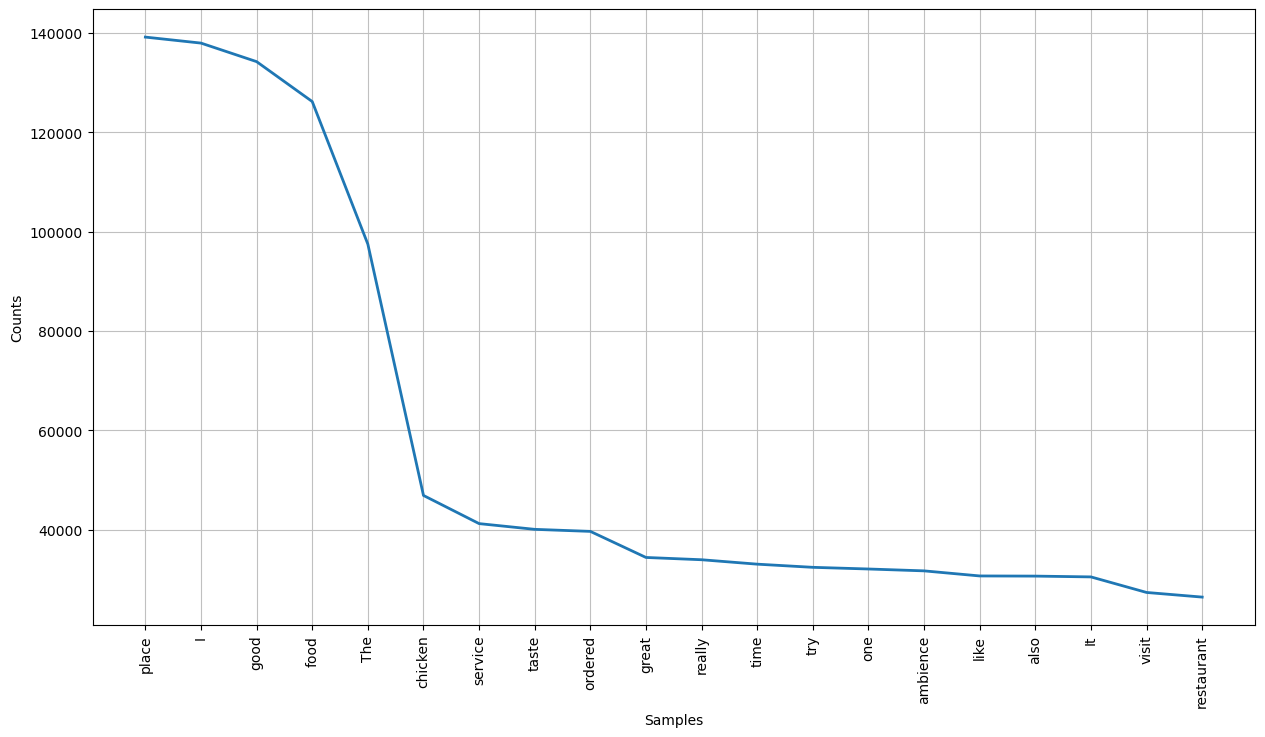

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [90]:
## takes 1 min
# Plotting the top 20 most frequent words

plt.figure(figsize = (15, 8))
fd.plot(20)

In [ ]:
## Observations
## Of the 20 most frequent words across customer reviews place,
# food , good , chicken ,taste ,service ,biryani

## but it is not that much clear whether food is good or not , 
## similarly what about chicken ??
## so to come up with meaningful insights , we can think of 
# using Bi-gram analysis..

## 6.. Performing Bi-gram & Trigram analysis on data

###### b..Bigram Analysis

In [91]:
from nltk import FreqDist, bigrams, trigrams

In [92]:
# Generating bigrams from the reviews
bi_grams = bigrams(total_reviews_1D)

In [93]:
bi_grams

<generator object bigrams at 0x00000200F737E9E0>

In [94]:
## takes 6-7 min for 10K Sample

# Getting the bigram frequency distribution
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1
# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(5)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824)]

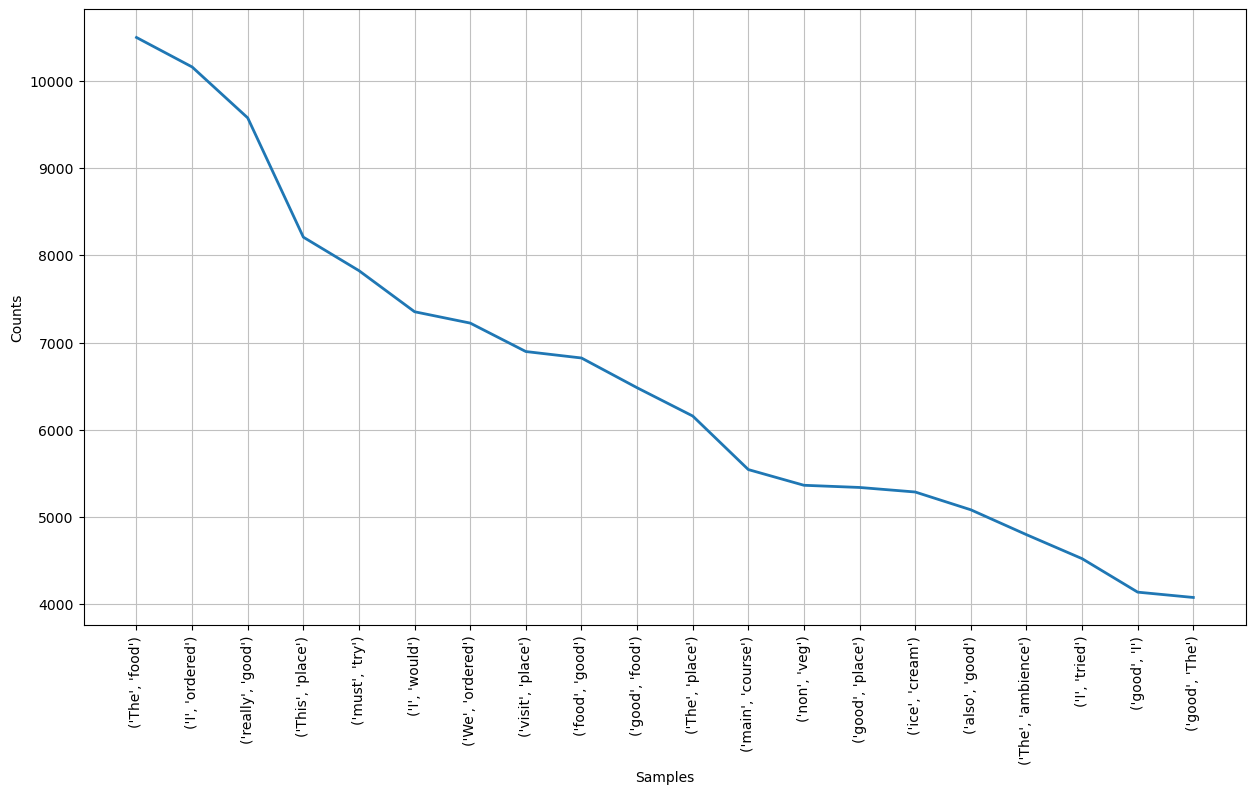

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [95]:
# Plotting the top 50 most frequent bigrams
# takes 1 min

plt.figure(figsize = (15, 8))
fd_bigrams.plot(20)


In [97]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

    Observations
    We have some new insights! Food items/preferences mentioned in the top
    50 bigrams are  :
    
    Fried Rice , Ice cream , non-veg , chicken biryani , main course
    Fried Rice
 

    Factors contributing to restaurant experience are : 
    good food > pocket friendly > good place > good place >
    value (for) money  > Home delivery..

    There's a key insight here: 
    the expense factor, which was missed by individual word frequency counts, 
    was picked up by the bigram frequency counts.

In [ ]:
### but there is no conclusion about north Indian or south Indian 
## bcz it can be dish or it can be regional people as well..
### so lets perform trigram anlysis to come up with some more meaningful insights..

##### c.. Trigram Analysis

In [98]:
from nltk import trigrams

In [99]:
# Generating trigrams from the reviews
trigrams = trigrams(total_reviews_1D)

In [100]:
## takes 1 min 
fd_trigrams = FreqDist()

for trigram in trigrams:
    fd_trigrams[trigram] += 1

In [101]:
fd_trigrams.most_common(5)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131)]

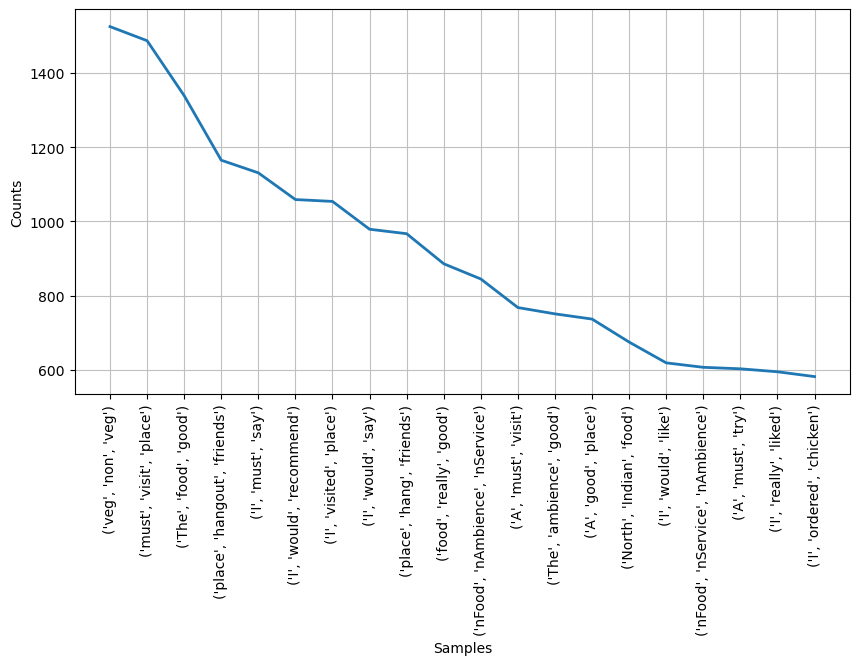

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [102]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(20)

In [103]:
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

## Observations
    There appears to be some bad data (strings of "f f f") 
    somewhere in the reviews, but we'll ignore that.

    The specific food preferences we can see here are 
    north Indian Food , paneer butter masala, South Indian food 
    & chicken fried rice...
    ie , Bangalore is full of chicken lovers...

In [ ]:
### Similarly we can use cuisines features for Text Analysis as well..

## 7.. Extract geographical-coordinates from data ..

    Prb st : where are most of the North-Indian restaurants situated
             in Bengaluru ? 
              First extract latitudes & longitudes from data 
              so that we are able to use maps..


    I need Latitudes & longitudes for each of the place for 
    geaographical Data analysis,so to fetch lat,lon of each place,
    use Geopy or 
    

        
### https://stackoverflow.com/questions/25888396/how-to-get-latitude-longitude-with-python
    There are couple of ways from which u can extract 
    latitudes & longitudes , follow above link :
    
    
    
### definition of latitudes & Longitudes :
    The globe is split into an imaginary 360 sections from 
    both top to bottom (north to south) 
    and 180 sections from side to side (west to east). 
    The sections running from top to bottom on a globe are called
    longitude 
    and the sections running from side to side on a globe are called latitude.
    
    Latitude is the measurement of distance north or south of the Equator.
    
    Every location on earth has a global address. 
    Because the address is in numbers, 
    people can communicate about location no matter what language they might speak. 
    A global address is given as two numbers called coordinates. 
    The two numbers are a location's latitude number and its longitude number 
    ("Lat/Long").
    
    
    now the immediate question is - how to extract lat & lon of location ??
    
    
    so using address or location feature , 
    we can extract what the geographical co-ordinates are !

    a) so just for simplicity  we will learn how to extract it 
        using 'location' feature
        
    b) If we have 'address' feature , we can extract more 
        accurate co-ordinates as address is breifly described..
    

In [ ]:
#pip install geocoder

In [104]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
### lets make this places more accurate , so that we are able 
## to extract more accurate latitudes & longitudes

### otherwise it might return geographical co-ordinates outside 
## of Bengaluru as well 

In [106]:
### Lets add 'Bangalore , Karnataka , India' so that u will get 
## more more accurate geographical co-ordinates..

df['location'] = df['location'] + ', Bangalore, Karnataka, India'

In [107]:
df.shape

(51717, 18)

In [108]:
df_copy = df.copy()

In [109]:
df_copy.shape

(51717, 18)

In [110]:
df_copy = df_copy.dropna(subset=['location'] )

In [111]:
df_copy.shape

(51696, 18)

In [112]:
df_copy['location'].isnull().sum()

0

In [113]:
pd.DataFrame({"name":df_copy['location'].unique()})

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [115]:
locations = pd.DataFrame({"name":df_copy['location'].unique()})

In [116]:
locations.head(2)

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"


In [ ]:
### lets make this places more accurate , so that we are able to 
## extract more accurate latitudes & longitudes

### otherwise it might return geographical co-ordinates outside 
## of Bengaluru as well 

In [117]:
locations.shape

(93, 1)

In [ ]:
## !pip install geopy

## (2.0.0)-2.2.0

In [ ]:
#!pip install geopy

In [118]:
from geopy.geocoders import Nominatim

In [119]:
## takes 2 mins

lat=[]
lon=[]

### assign timeout=None in order to get rid of timeout error..

geolocator = Nominatim(user_agent = "app", timeout = None)

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)
        

In [ ]:
'''

## increase your recursion limit , if u will get a error as 
Maximum Recursion Depth Exceeded

use below code :

import sys
sys.getrecursionlimit()

sys.setrecursionlimit(10000)
sys.getrecursionlimit()

:: Do follow Spatial_Zomato_whole.ipynb

'''

In [120]:
locations['latitude'] = lat
locations['longitude'] = lon

    We have found out latitude and longitude of each location listed in the dataset using geopy
    This is used to plot maps.

In [153]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


## 8.. Lets build geographical Heat-Maps 

In [121]:
### lets figure it out whether we have misssing values or not !
locations.isnull().sum()

name         0
latitude     3
longitude    3
dtype: int64

In [122]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
45,"St. Marks Road, Bangalore, Karnataka, India",NaN,NaN
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [123]:
### Rammurthy Nagar is situated in north-eastern part of Bangalore
### lets find out whether Rammurthy Nagar has geographical 
## attributes or not..

loc= geolocator.geocode(locations['name'][79])
hasattr(loc,'latitude')

### it means that "Rammurthy Nagar" doesn't have property as latitude , 
## ie geopy is unable to find geo-graphical co-ordinates for "Rammurthy Nagar".


False

In [ ]:
### lets take help of google in such circumstances..
### google as "co-ordinates of Rammurthy Nagar bengalore" & find co-ordinates as :
### 13.0163° N, 77.6785° E

In [124]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [ ]:
### for St. Marks Road ,
### 12.969332 (Lat) & 77.600509(Lon)

In [125]:
locations['latitude'][45] = 12.969332
locations['longitude'][45] = 77.600509

In [126]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [127]:
locations.isnull().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [128]:
locations.head(3)

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090


In [ ]:
### lets find it out what are those areas where we have most 
## number of North-Indian restaurants ?

## ie lets extract dataframe of only 'North Indian' cuisine restaurant..

In [ ]:
### so if we have any missing value in cuisines feature , lets fix that ..

In [129]:
df['cuisines'].isnull().sum()

45

In [130]:
df2 = df.dropna(subset=['cuisines'])

In [131]:
df['cuisines'].isnull().sum()

45

In [132]:
north_indian = df2[df2['cuisines'].str.contains('North Indian')]

In [133]:
north_indian_Rest_count = north_indian['location'].value_counts().\
                            to_frame().reset_index().rename(columns=\
                            {'index':'name','location':'count'})

In [134]:
north_indian_Rest_count

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [ ]:
#### lets create Heatmap of this results so that it becomes more 
## user-friendly..
## now In order to perform Spatial Anlysis(Geographical Analysis) ,
## we need latitudes & longitudes of every location..

### so lets merge both the dataframes or append one into another
## in order to get geographical co-ordinates..

In [135]:
heatmap_df = north_indian_Rest_count.merge(locations , \
                                       on='name' , how='left')
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.880358,77.579658
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,13.010129,77.554801
88,"West Bangalore, Bangalore, Karnataka, India",1,13.022235,77.567183


In [136]:
heatmap_df.isna().sum()

name         0
count        0
latitude     0
longitude    0
dtype: int64

In [137]:
import folium

def generateBaseMap(location=None, zoom_start=None):
    base_map = folium.Map(location=location, zoom_start=zoom_start)
    return base_map


In [ ]:
'''

### geographical co-ordinates of Bengalore-->> 12.9716° N, 77.5946° E ( Just google it )

basemap = generateBaseMap(location=[12.97, 77.59],zoom_start=12)
basemap


'''

In [138]:
from folium.plugins import HeatMap

In [139]:
heatmap_df[['latitude','longitude','count']].values

array([[1.29112758e+01, 7.76045654e+01, 2.46900000e+03],
       [1.29116225e+01, 7.76388622e+01, 1.12300000e+03],
       [1.29696365e+01, 7.77497448e+01, 1.05900000e+03],
       [1.29552572e+01, 7.76984163e+01, 1.03800000e+03],
       [1.28803576e+01, 7.75796579e+01, 9.58000000e+02],
       [1.29348429e+01, 7.76189768e+01, 7.55000000e+02],
       [1.29521804e+01, 7.76041899e+01, 7.01000000e+02],
       [1.29732913e+01, 7.76404672e+01, 6.78000000e+02],
       [1.28487599e+01, 7.76482530e+01, 6.75000000e+02],
       [1.29292731e+01, 7.75824229e+01, 6.64000000e+02],
       [1.29310319e+01, 7.76782471e+01, 6.59000000e+02],
       [1.29277245e+01, 7.76327822e+01, 6.01000000e+02],
       [1.29204410e+01, 7.76653284e+01, 5.29000000e+02],
       [1.29390255e+01, 7.76238477e+01, 4.08000000e+02],
       [1.29364846e+01, 7.76134783e+01, 3.90000000e+02],
       [1.29778793e+01, 7.76246697e+01, 3.76000000e+02],
       [1.29755264e+01, 7.76067902e+01, 3.59000000e+02],
       [1.29327778e+01, 7.76294

In [141]:
basemap = generateBaseMap(location = [])

In [142]:
HeatMap(heatmap_df[['latitude','longitude','count']].\
        values.tolist() ,zoom=20,radius=15).add_to(basemap)

In [143]:
basemap

In [ ]:
## basemap

In [ ]:
### Conclusions : 
## in the city centre area ,majority of the Restaurants are avaiable :

In [ ]:
### Note : Its always good to write conclusions bcz as a Data Analyst 
## or a Data Scientist u have to work in a team 

### & probably some of your Team members are completely unaware 
## about Technical things..

### conclusions(Inferences)
    1..It is clear that restaurants tend to concentrate in central bangalore area.
    2..The clutter of restaurants lowers are we move away from central.
    3..So,potential restaurant entrepreneurs can refer this and 
        find out good locations for their venture.
        
    4..note heatmap is good when we have latitude,longitude or 
        importance of that particular place or count of that place¶

### Similar Problem Statements :
    In which area of Bengalore most of the South Indian Restaurants available ?
    In which area of Bengalore most of the Chinese Restaurants avaialble ?
    In which area of Bengalore most of the Mughlai Restaurants avaialble ?

## 9.. How to automate your task : ie Perform Automation ..

In [ ]:
### For above problems - Lets Automate our Analysis :
## (bcz writing same 100 LOC again makes no sense .. )

### So whenever automation comes into picture  , lets design a function :    

#### lets automate all these for north indian  , south Indian & chinese...

In [144]:
def get_heatmap(cuisine):
    
    cuisine_df = df2[df2['cuisines'].str.contains(cuisine)]
    
    cuisine_Rest_count = cuisine_df['location'].value_counts().\
                        to_frame().reset_index().rename(columns=\
                        {'index':'name','location':'count'})
    
    heatmap_df = cuisine_Rest_count.merge(locations, on='name',\
                                          how='left')
    
    print(heatmap_df.head(4))
    
    basemap = generateBaseMap(location=[12.97, 77.59],zoom_start=12)
    
    HeatMap(heatmap_df[['latitude','longitude','count']].values.\
                    tolist(),zoom=20,radius=15).add_to(basemap)
    return basemap

In [ ]:
get_heatmap('South Indian')

## 10.. Which are top 10 menu_item ..?

In [ ]:
df['menu_item'].sample(7)

### good to use some own code as we have couple of menus for 
## each of the row.. ie value_counts() will not be handy !


## gives little wrong results -->> df['menu_item'].value_counts()
## [0:10].plot(kind='bar')

In [145]:
df['menu_item'].isnull().sum()

## if u have missing values , u have to deal with that ..

0

In [149]:
def clear_text(data):
    
    menu_item_list = []
    
    for row in data['menu_item']:
        for item in row.split(','):
            if item!='[]':
                menu_item_list.append(item.strip())
    return pd.Series(menu_item_list)

In [150]:
clear_text(df)

0           ['Chocolate Fantasy (Pack Of 5)'
1                     'Pan Cake (Pack Of 6)'
2                 'Gulab Jamun (Pack Of 10)'
3                 'Gulkand Shot (Pack Of 5)'
4          'Chocolate Decadence (Pack of 2)'
                         ...                
1311320             'Fresh Sweet Lime Water'
1311321            'Fresh Salted Lime Water'
1311322                     'Lemon Iced Tea'
1311323                     'Berry Iced Tea'
1311324                    'Kokum and Lime']
Length: 1311325, dtype: object

<AxesSubplot:>

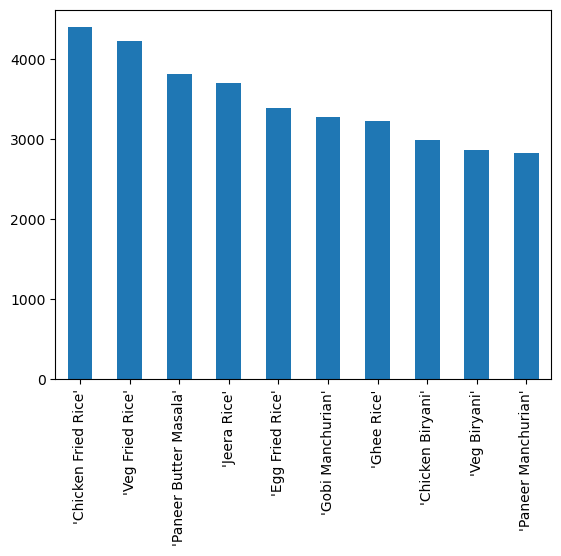

In [151]:
clear_text(df).value_counts()[0:10].plot(kind='bar')

    --->> As we can notice from the above chart that North indian 
            at the top of cuisines provided in Bangalore
            
    --->> Still we find some bars for Fast Food, Biryani which is not 
            related to specific culture/ or cuisines
            
    --->> Let's extract those related to country culture wise